<a href="https://colab.research.google.com/github/Aayush121202/Reinforcement_Learning/blob/main/Blackjack_MC_Control_ES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rc('text', usetex=False)

import gym
import numpy as np
from collections import defaultdict
from utils import plot_state_values
from utils import plot_policy

In [3]:
env = gym.make('Blackjack-v1')

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [4]:
def generate_episode_from_policy(env, pi):
    state = env.reset()
    episode = []
    while True:
        # select the best action according to the policy pi if it exists
        # otherwise choose 0 (arbitrary policy not changed so far)
        action = pi[state] if state in pi else 1
        next_state, reward, terminate, _ = env.step(action)
        episode.append((state, action, reward))
        state = next_state
        if terminate:
            break

    return episode

In [5]:
# transform Q state-value function to V value function
def QtoV(Q):
    return {state: np.max(values) for state, values in Q.items()}

In [6]:
def MCES(env, generate_episode, gamma, episodes):
    n_actions = env.action_space.n

    # initialize arbitrarily pi, Q, returns
    pi = {}
    Q = defaultdict(lambda: np.zeros(n_actions))
    returns = {}

    for episode in range(episodes):
        trajectory = generate_episode(env, pi)
        G, T = 0, len(trajectory)

        for i in range(T-1, -1, -1):
            state, action, reward = trajectory[i]
            G += gamma**i * reward

            visited_state = set()
            if (state, action) not in visited_state:
                # append G to returns (s_t, a_t)
                reward, visits = returns.get((state, action), [0, 0])
                returns[(state, action)] = [reward + G, visits + 1]

                Q[state][action] = (reward + G) / (visits + 1)
                pi[state] = np.argmax(Q[state])

                visited_state.add((state, action))

    return Q, pi

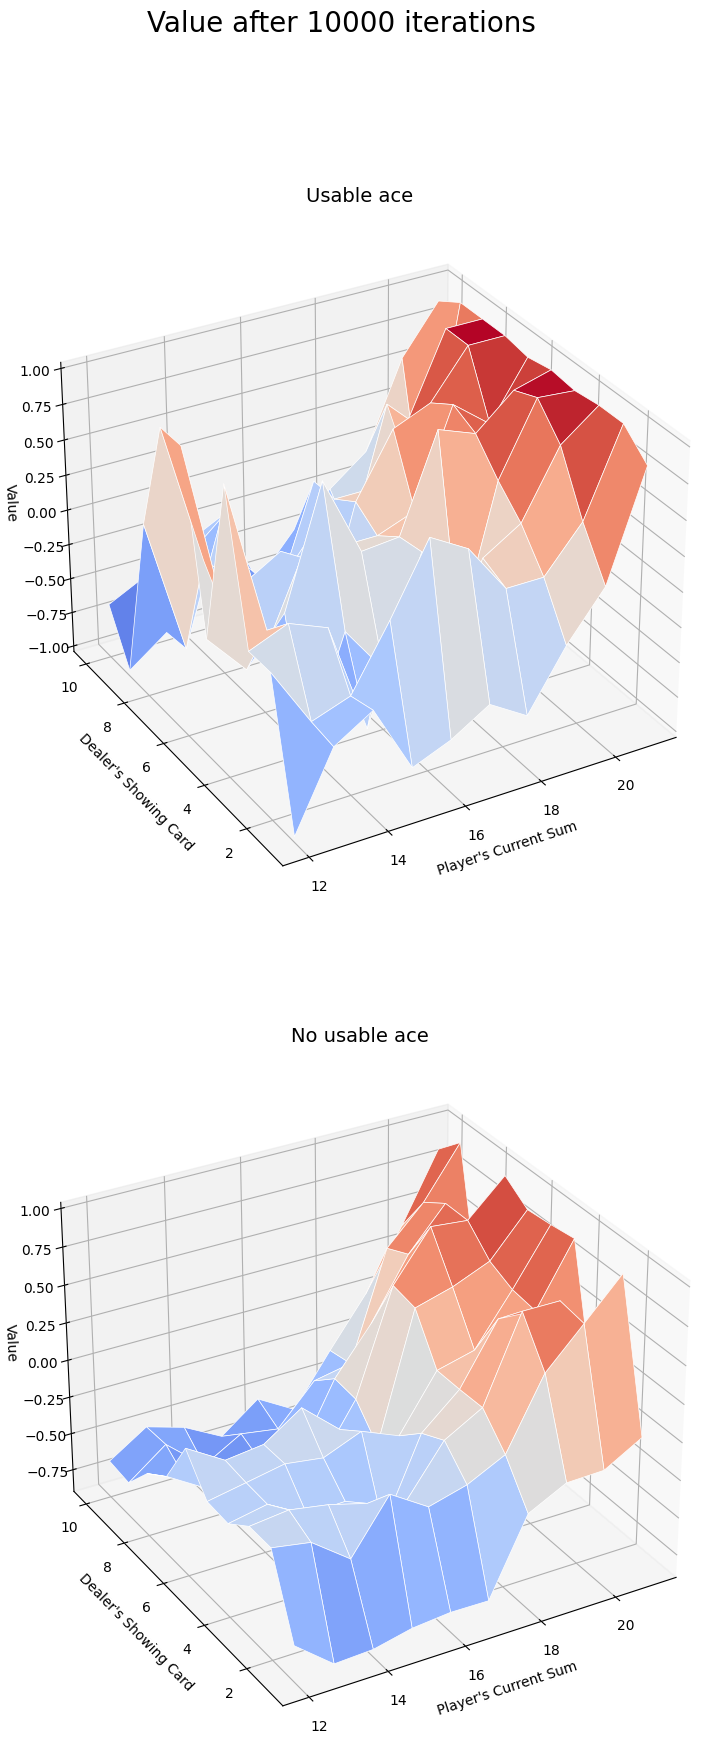

In [9]:
n_episodes = 10000
Q, pi = MCES(env, generate_episode_from_policy, 1.0, n_episodes)
V = QtoV(Q)
plot_state_values(V, n_episodes)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


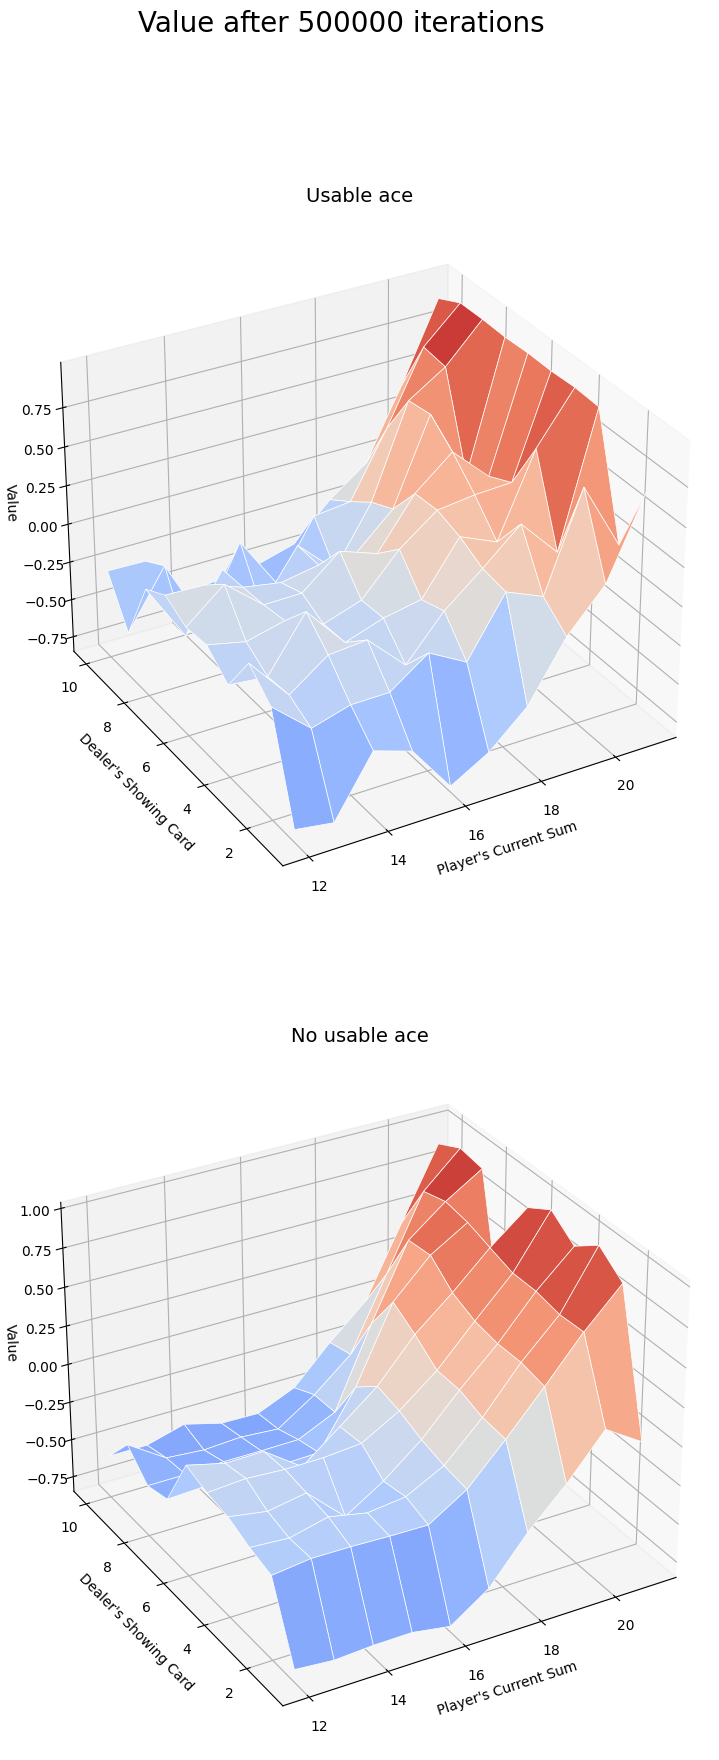

In [10]:
n_episodes = 500000
Q, pi = MCES(env, generate_episode_from_policy, 1.0, n_episodes)
V = QtoV(Q)
plot_state_values(V, n_episodes)